In [1]:
import pandas as pd

# Define the dataset path
path = "/kaggle/input/diet-analysis/weight_change_dataset.csv"

# Load the dataset
dataset = pd.read_csv(path)

# Display the first few rows
print(dataset.head())


   Participant ID  Age Gender  Current Weight (lbs)  BMR (Calories)  \
0               1   56      M                 228.4          3102.3   
1               2   46      F                 165.4          2275.5   
2               3   32      F                 142.8          2119.4   
3               4   25      F                 145.5          2181.3   
4               5   38      M                 155.5          2463.8   

   Daily Calories Consumed  Daily Caloric Surplus/Deficit  \
0                   3916.0                          813.7   
1                   3823.0                         1547.5   
2                   2785.4                          666.0   
3                   2587.3                          406.0   
4                   3312.8                          849.0   

   Weight Change (lbs)  Duration (weeks) Physical Activity Level  \
0                  0.2                 1               Sedentary   
1                  2.4                 6             Very Active   
2 

In [3]:
# Inspect the dataset
print(dataset.info())
print(dataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Participant ID                 100 non-null    int64  
 1   Age                            100 non-null    int64  
 2   Gender                         100 non-null    object 
 3   Current Weight (lbs)           100 non-null    float64
 4   BMR (Calories)                 100 non-null    float64
 5   Daily Calories Consumed        100 non-null    float64
 6   Daily Caloric Surplus/Deficit  100 non-null    float64
 7   Weight Change (lbs)            100 non-null    float64
 8   Duration (weeks)               100 non-null    int64  
 9   Physical Activity Level        100 non-null    object 
 10  Sleep Quality                  100 non-null    object 
 11  Stress Level                   100 non-null    int64  
 12  Final Weight (lbs)             100 non-null    floa

2. Data Preprocessing

    Handle Missing Values: Impute or remove missing values.
    Encode Categorical Variables: Use one-hot encoding for gender or other categorical columns.
    Normalize Continuous Variables: Scale features like weight, caloric intake, macronutrients, etc.

# 3. Building the Neural Network Model

Here we use a simple feedforward neural network to predict weight change.

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
path = "/kaggle/input/diet-analysis/weight_change_dataset.csv"
dataset = pd.read_csv(path)

# One-hot encode the categorical columns
dataset = pd.get_dummies(dataset, columns=['Gender', 'Physical Activity Level', 'Sleep Quality'], drop_first=True)

# Split the dataset into features and target
X = dataset.drop(columns=['Weight Change (lbs)'])  # Ensure the target column name is correct
y = dataset['Weight Change (lbs)']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Single output for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

print("Model is defined, compiled, and ready for training.")


Model is defined, compiled, and ready for training.


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 4. Model Training

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 93.1025 - mae: 6.1476 - val_loss: 36.1321 - val_mae: 4.0939
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 103.2587 - mae: 5.9388 - val_loss: 35.5769 - val_mae: 4.0953
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 63.6424 - mae: 5.0238 - val_loss: 35.2521 - val_mae: 4.0992
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 67.1971 - mae: 5.0797 - val_loss: 34.9688 - val_mae: 4.1020
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 95.4606 - mae: 5.8248 - val_loss: 34.5546 - val_mae: 4.0907
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 74.5276 - mae: 5.3472 - val_loss: 34.0347 - val_mae: 4.0718
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 82.0956 - mae: 5.3944 - val_loss: 33.3438 - val_mae: 4.0701
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 60.3609 - mae: 4.8385 - val_loss: 32.6896 - val_mae: 4.0816
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 73.33

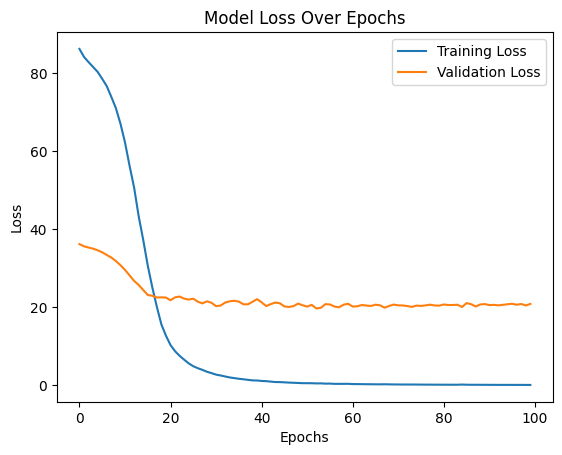

In [21]:
# Train the neural network model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# 5. Model Evaluation

In [25]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test MAE: {test_mae:.4f}')


Test Loss: 13.0999
Test MAE: 2.5817


# 6. Making Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
      Actual  Predicted
83  1.200000   1.665492
53 -1.135826  -1.095670
70 -1.658347  -0.814683
45  4.800000  -2.055978
44 -4.988028  -2.821995


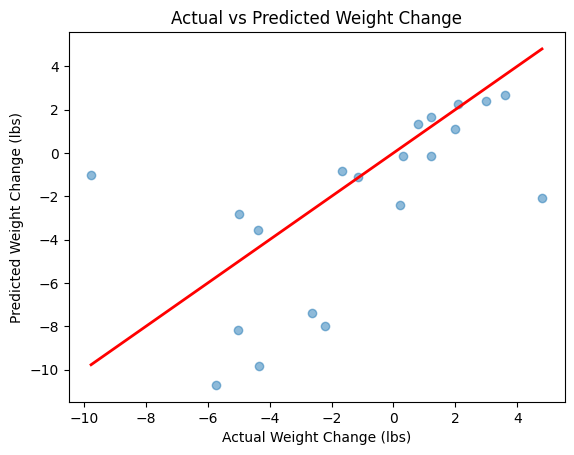

In [26]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Display the first few predictions
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
print(predictions_df.head())

# Visualize the predictions vs actual values
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Ideal line
plt.title('Actual vs Predicted Weight Change')
plt.xlabel('Actual Weight Change (lbs)')
plt.ylabel('Predicted Weight Change (lbs)')
plt.show()


# 7.Save the Model

In [27]:
# Save the trained model
model.save('weight_change_model.h5')
print("Model saved to 'weight_change_model.h5'.")


Model saved to 'weight_change_model.h5'.
